In [ ]:
# setup
import pandas as pd
import sys
import os

# ----- Shows distribution in table form -----

# helper functions
sys.path.append(os.path.abspath(".."))
from Helper_funtions import analyze_distribution, analyze_subject_distribution
from answer_categories import question_orders

# load data
file_path = os.path.join("..", "Data", "Fertige Tabelle.xlsx")
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
n = len(df)

# ---- Single-Choice Questions ----

single_choice = [
    "Use AI school and freetime",
    "Frequency of use education",
    "Frequency of use everyday life",
    "Usefullness AI",
    "Deal with AI",
    "Understanding AI",
    "Reliability AI",
    "Concerns AI",
    "Teachers preparing lessons",
    "Teachers giving grades",
    "Mates using AI",
    "Allowance to use AI",
    "Frequency use of AI_school",
    "Help of AI"
]

for column in single_choice:
    analyze_distribution(df, column, f"🔹 {column}")

# ---- Multiple-Choice Questions ----

multiple_choice = [
    "Used AI",
    "Use of AI in freetime",
    "Most used subjects",
    "Purposes to use AI",
    "Reasons to use AI"
]

for column in multiple_choice:
    analyze_subject_distribution(df, column)

# ---- Internet Terms  ----

internet_columns = [col for col in df.columns if col.startswith("Internet terms_")]

print("\n🔹 Distribution of Internet terms-Questions:")
for column in internet_columns:
    analyze_distribution(df, column, column)

# ---- True/False Questions  ----

true_false_columns = [col for col in df.columns if col.startswith("True/False_")]

print("\n🔹 Distribution of True/False-Questions:")
for column in true_false_columns:
    analyze_distribution(df, column, column)

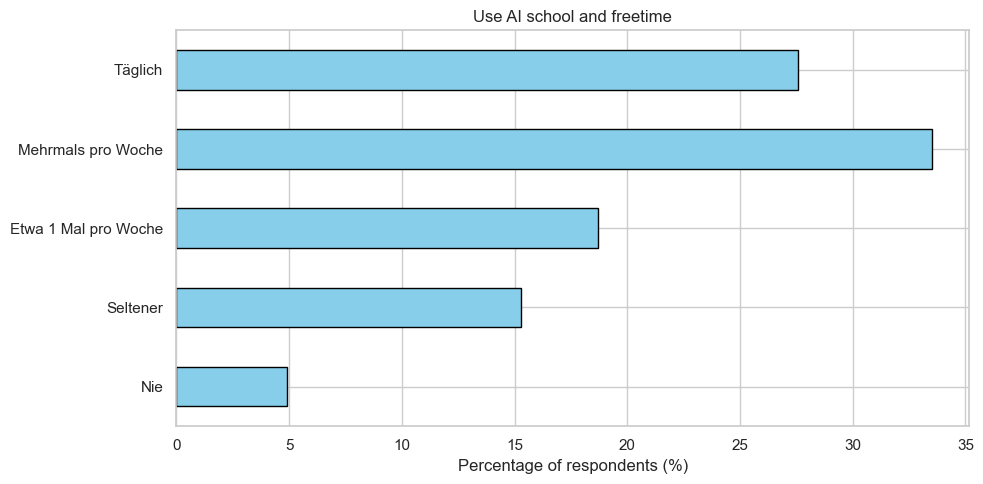

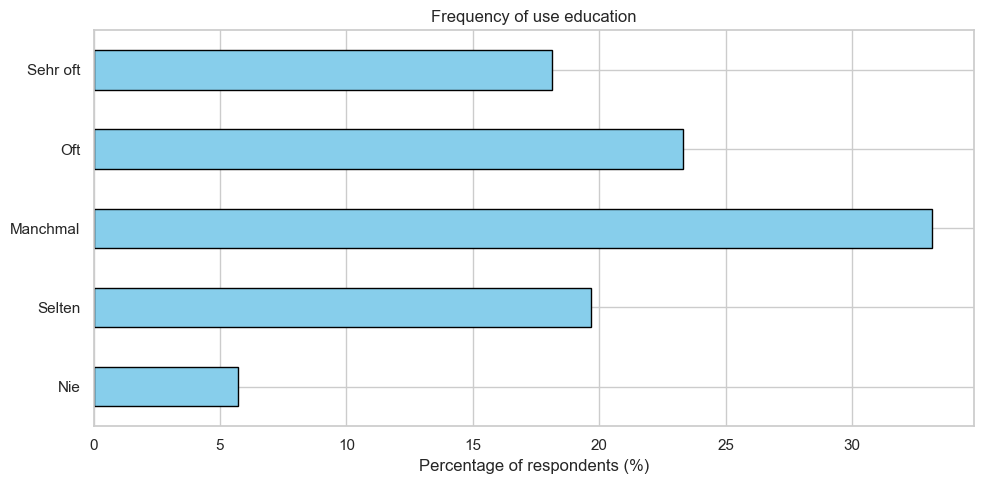

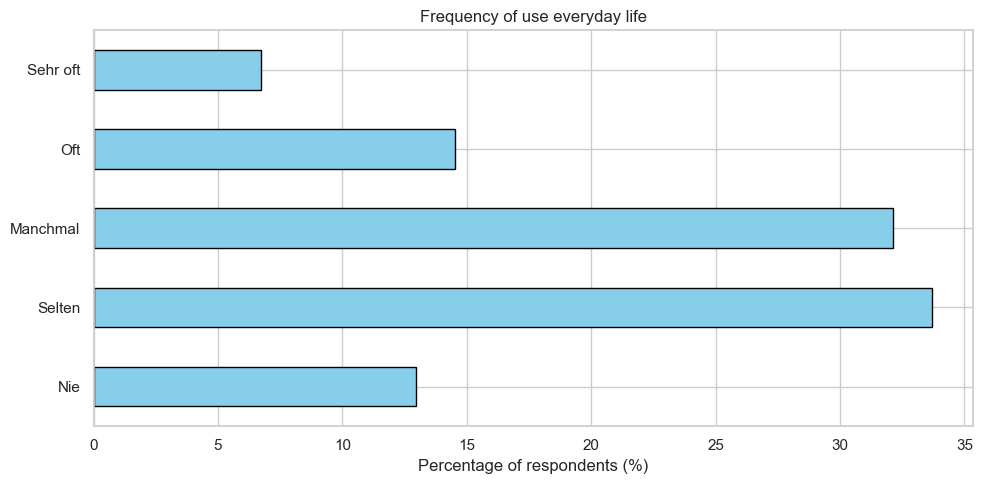

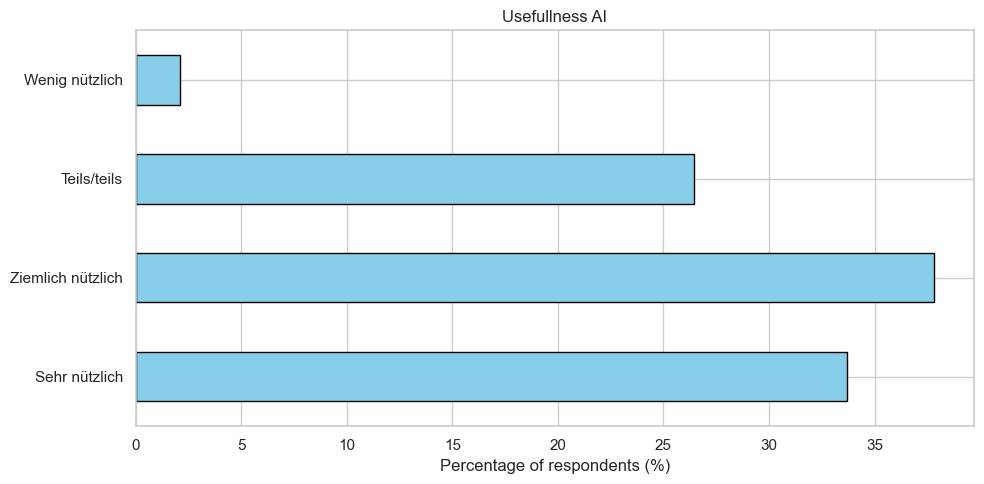

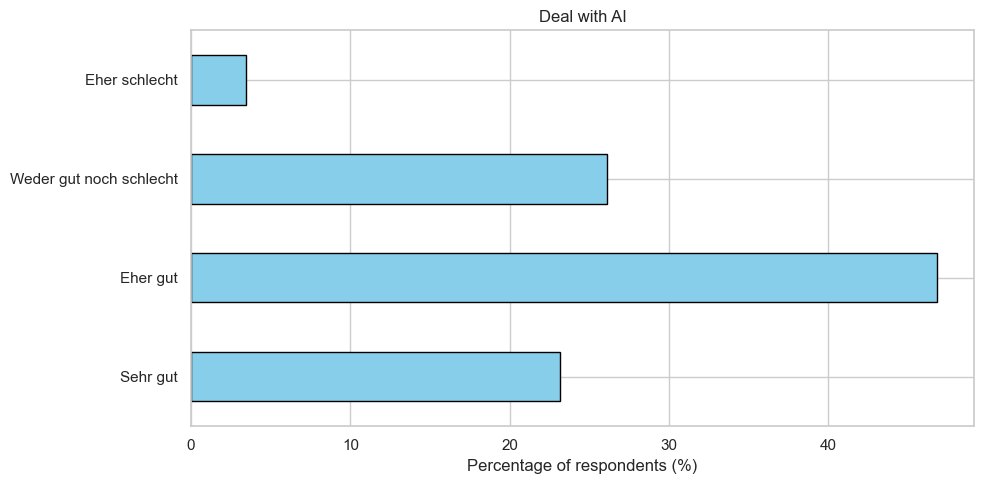

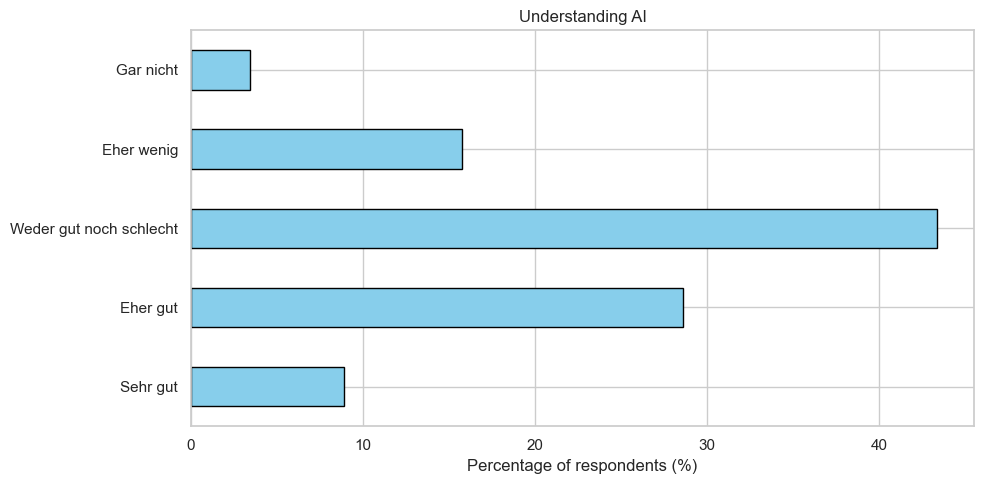

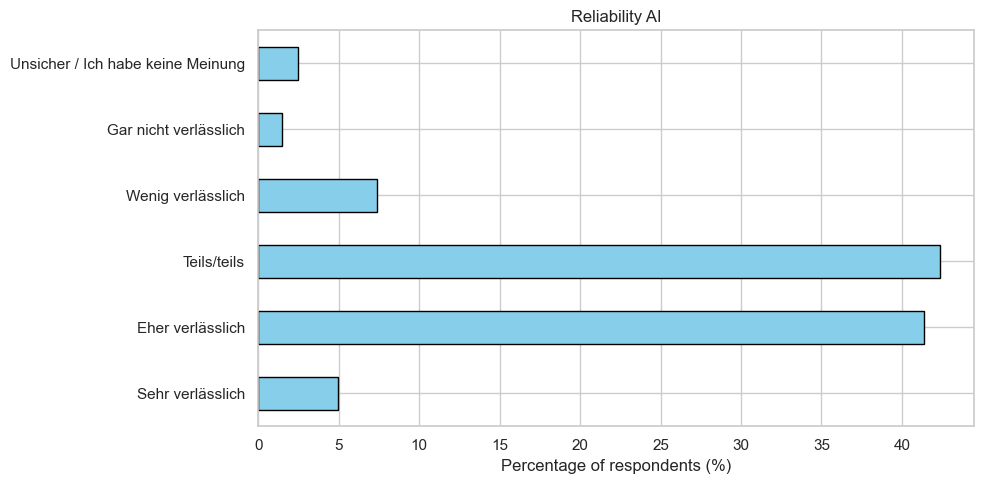

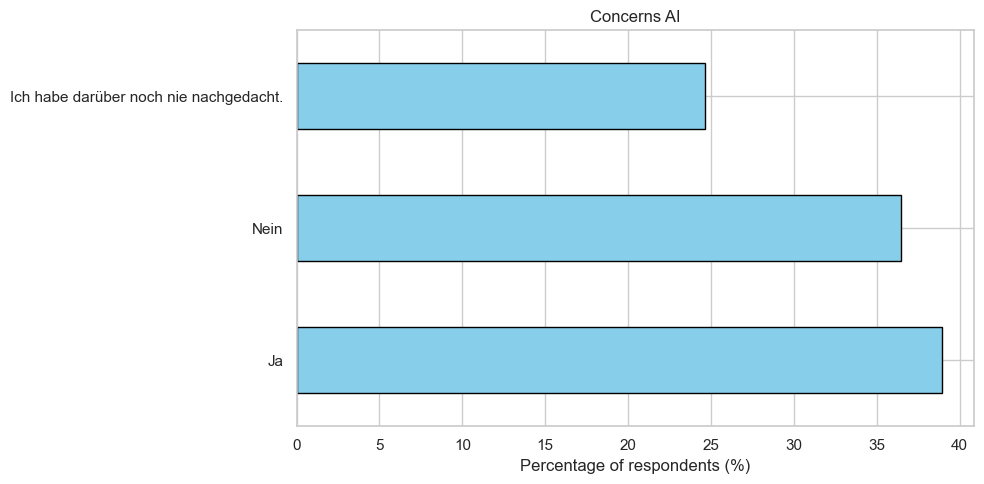

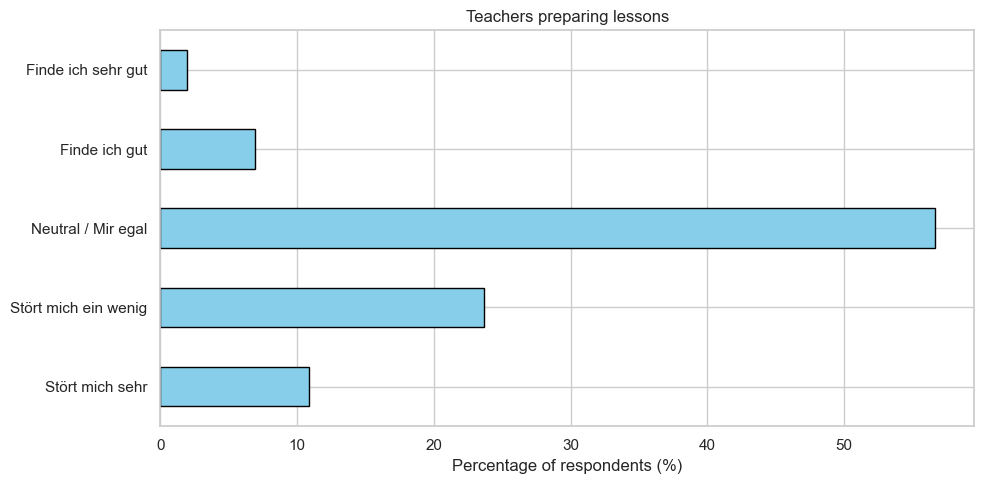

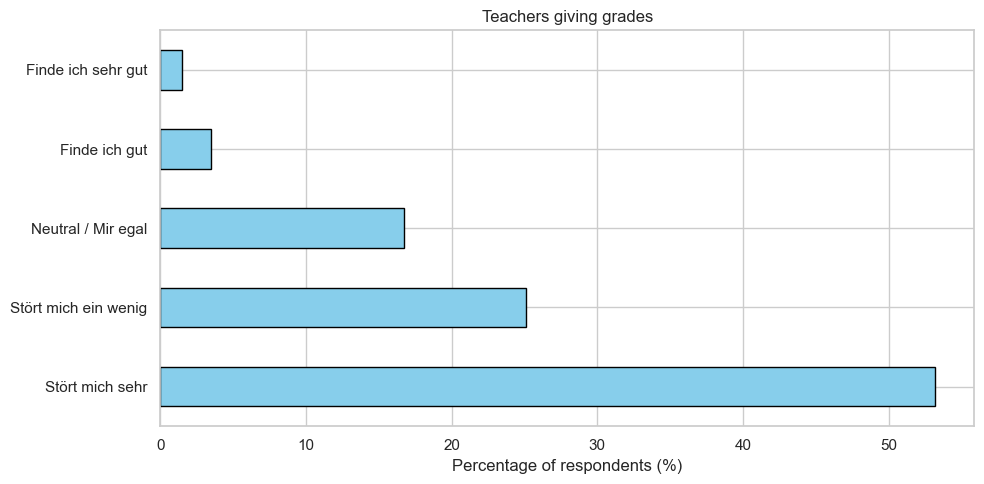

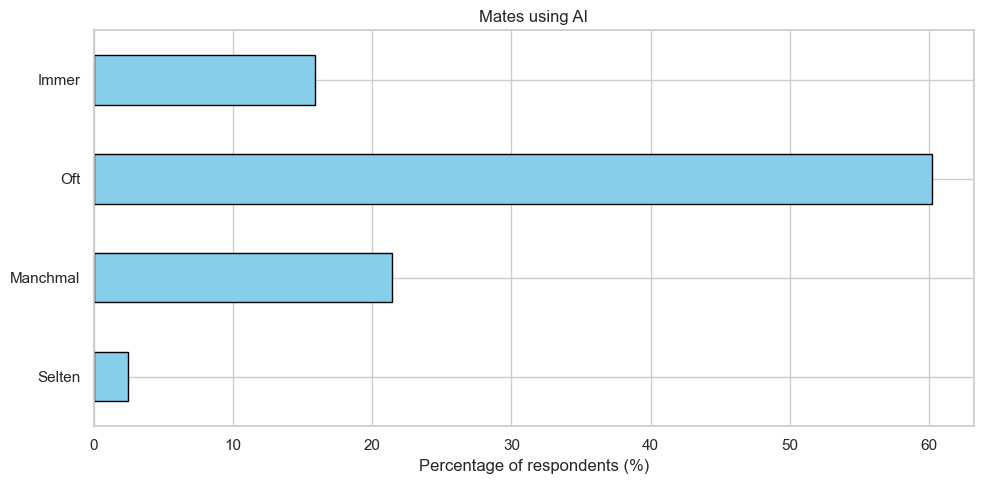

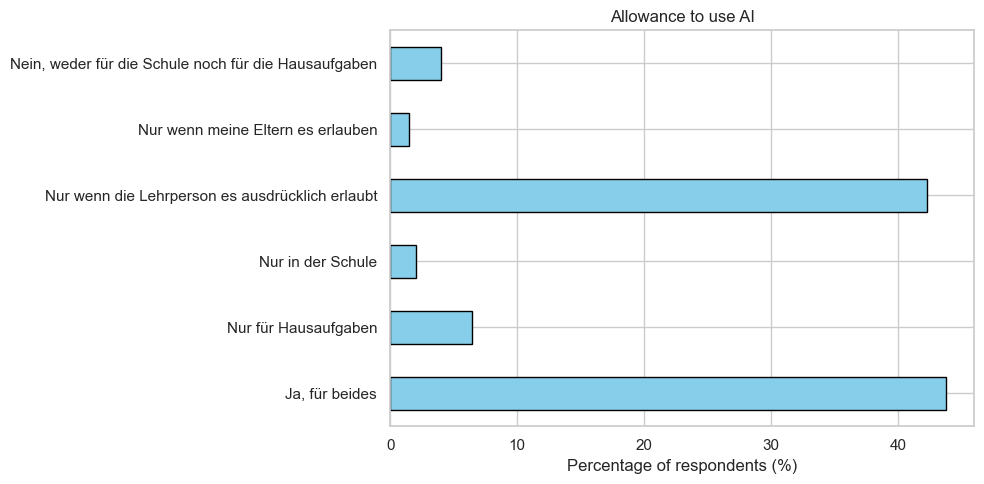

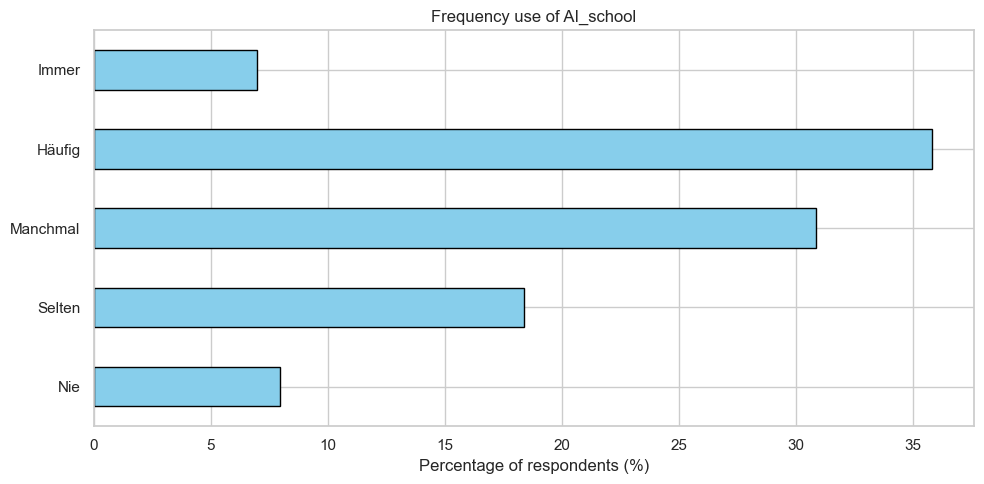

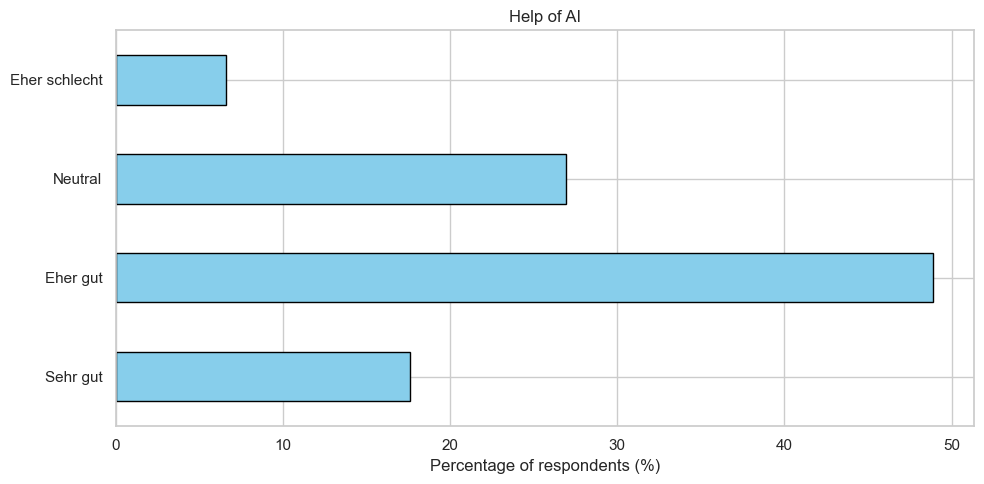

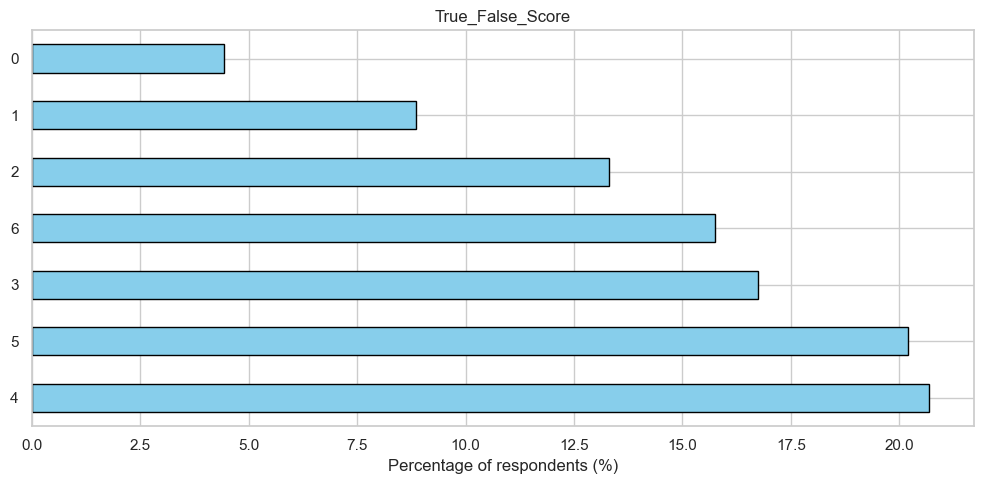

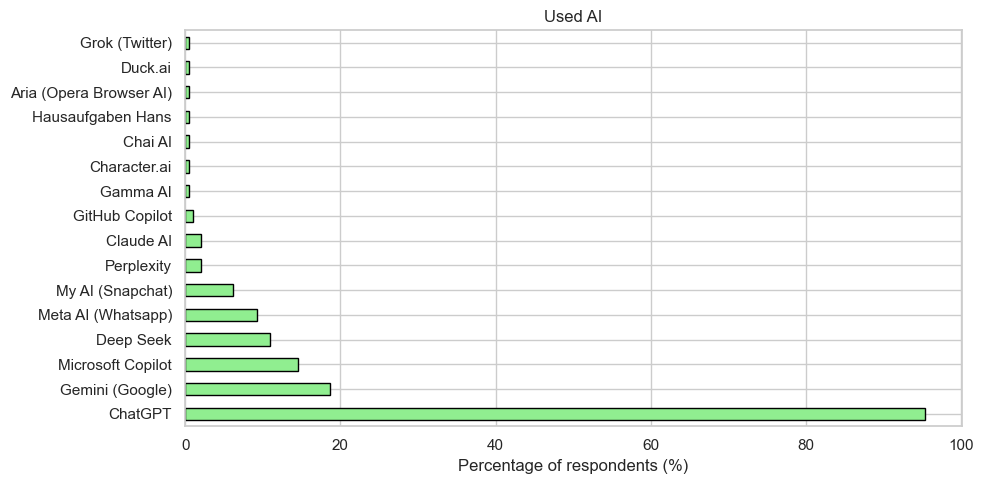

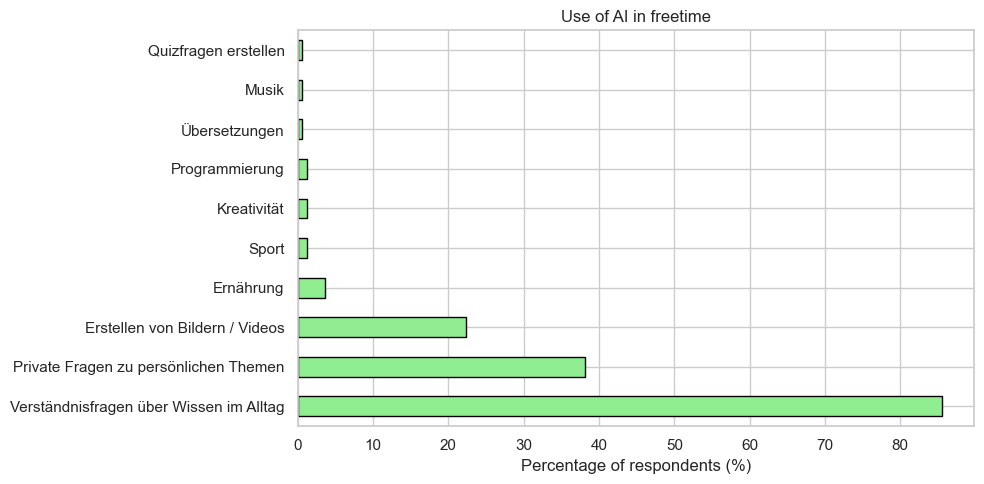

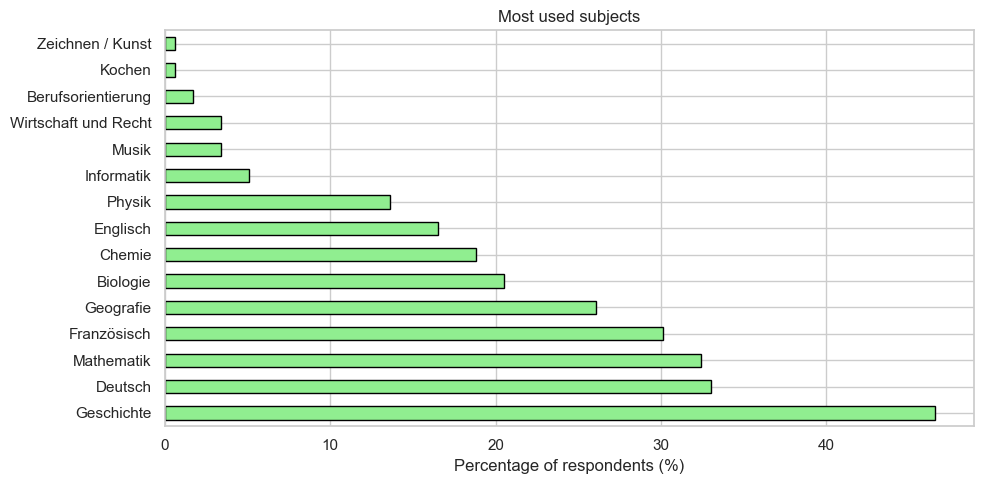

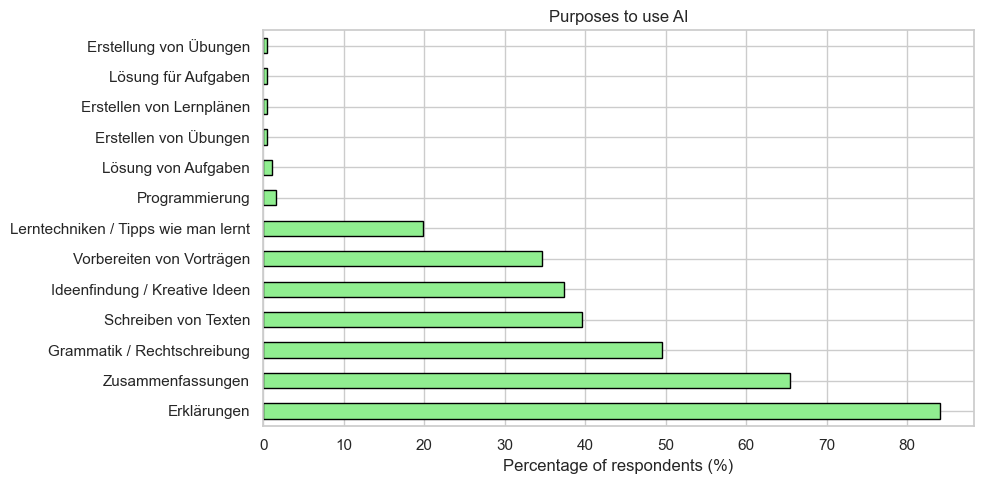

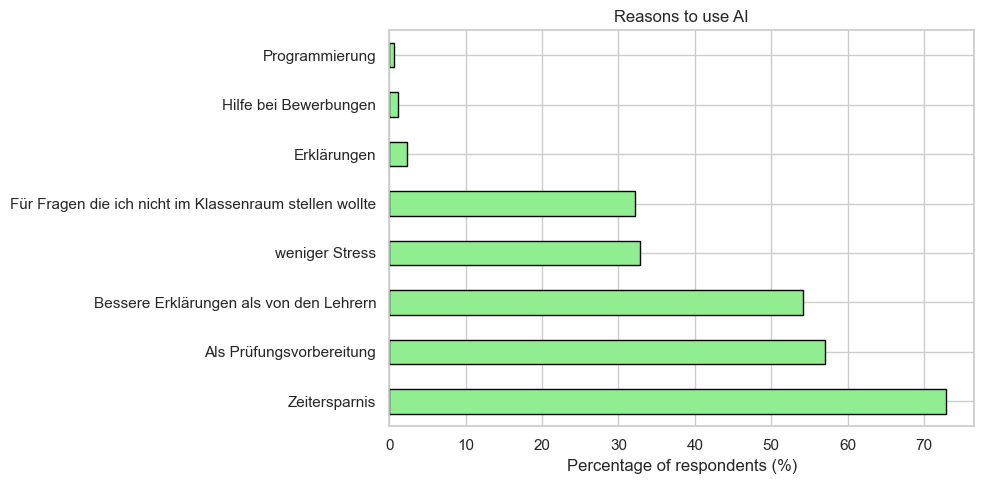

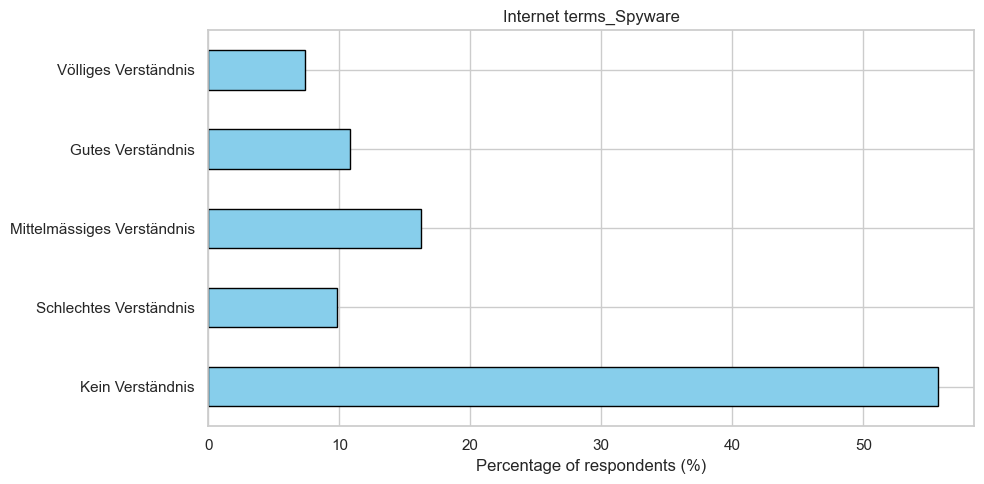

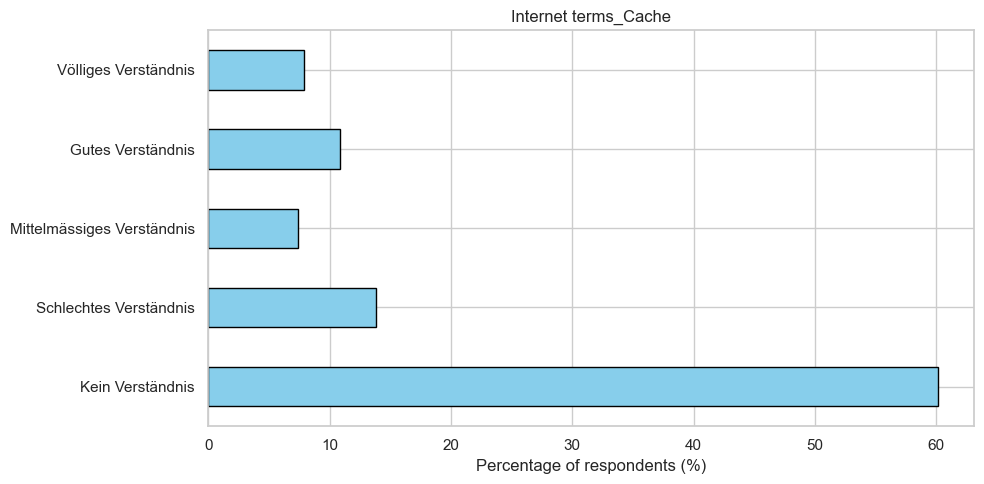

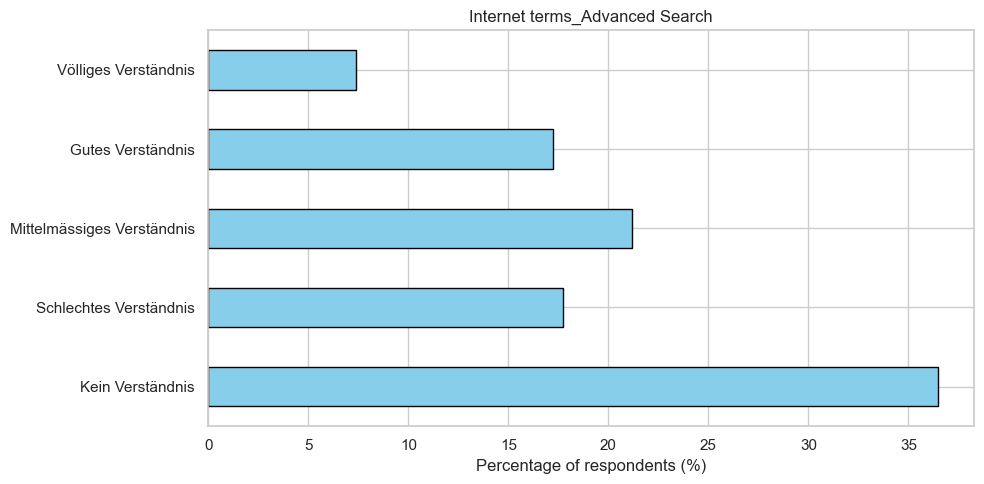

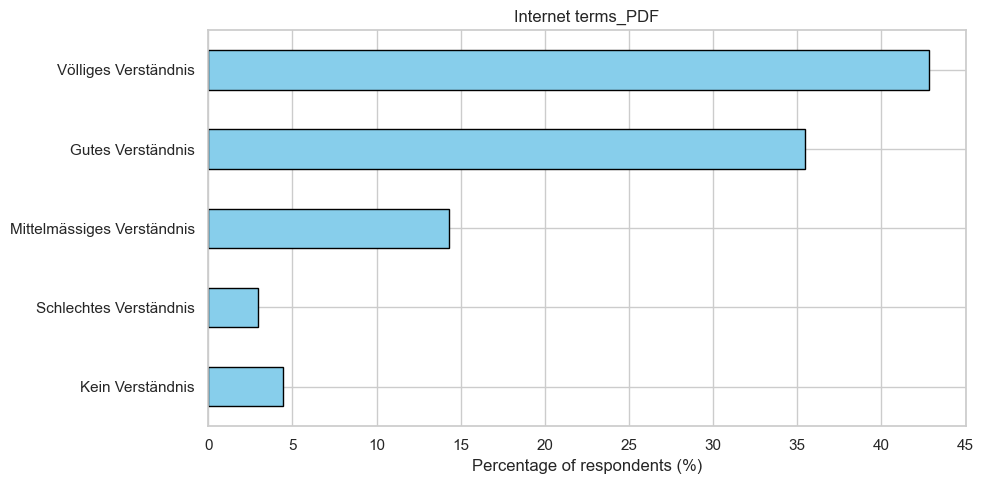

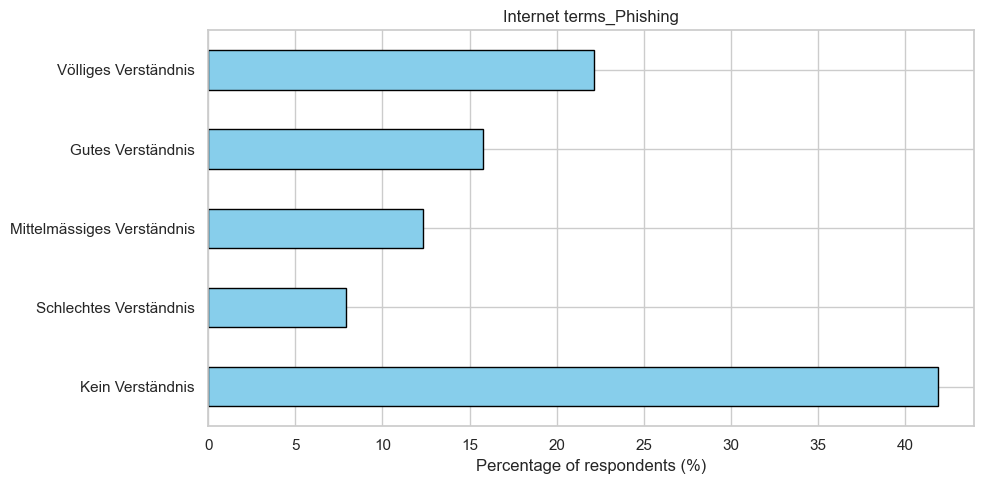

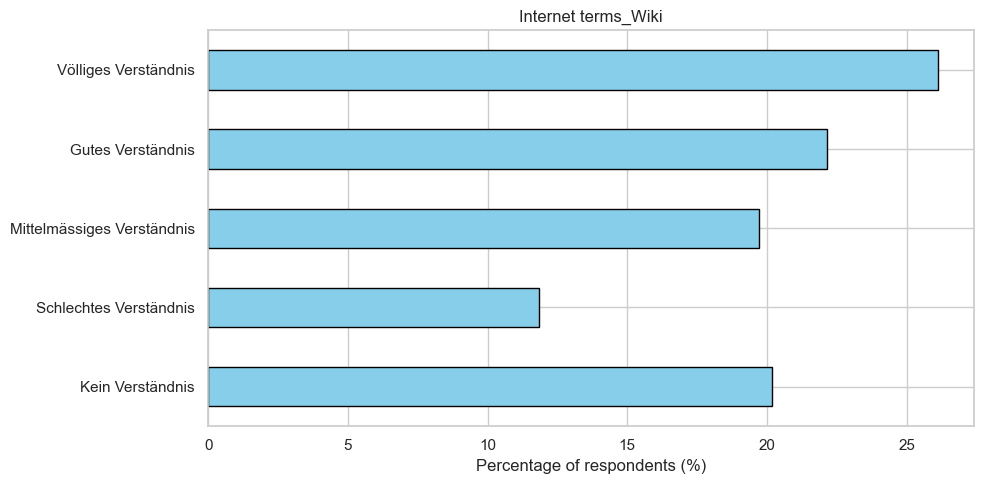

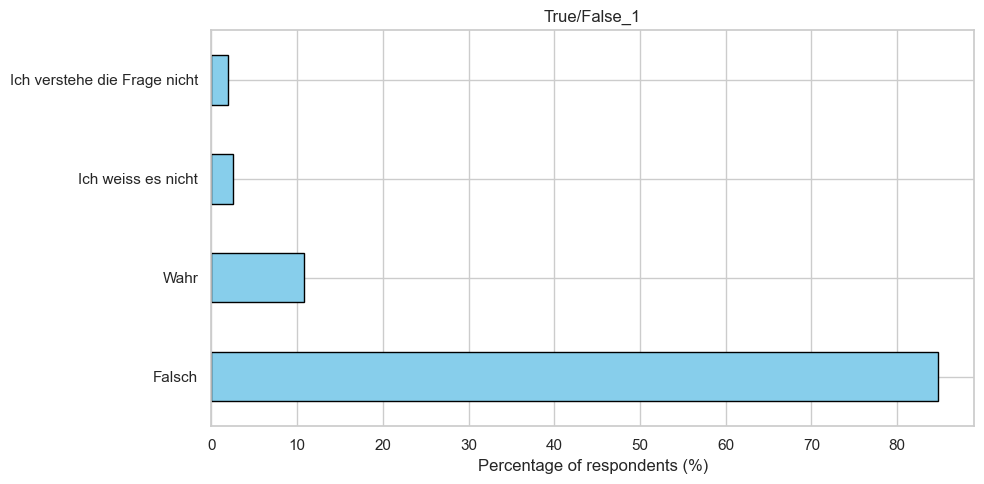

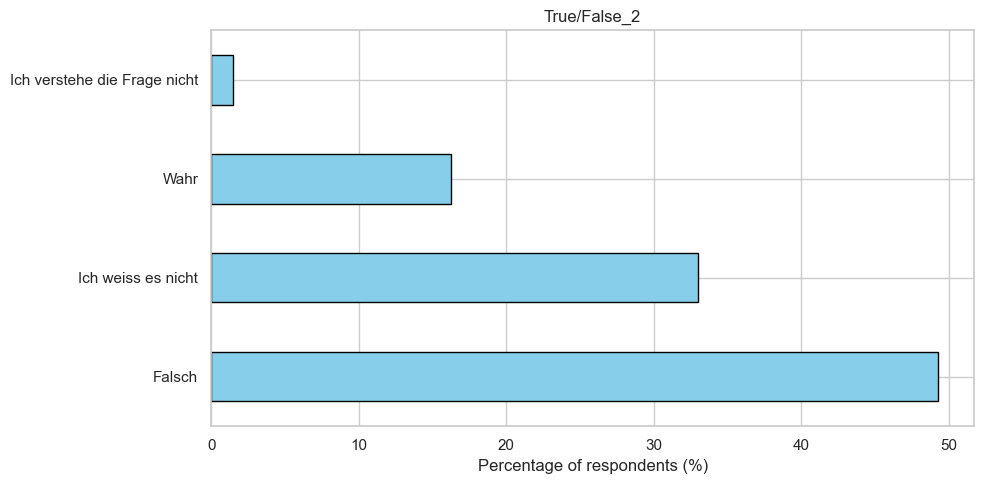

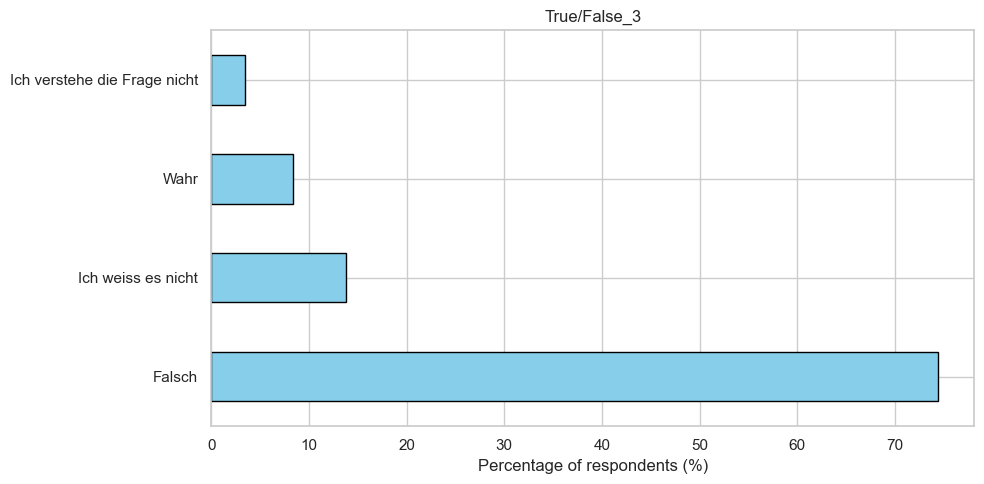

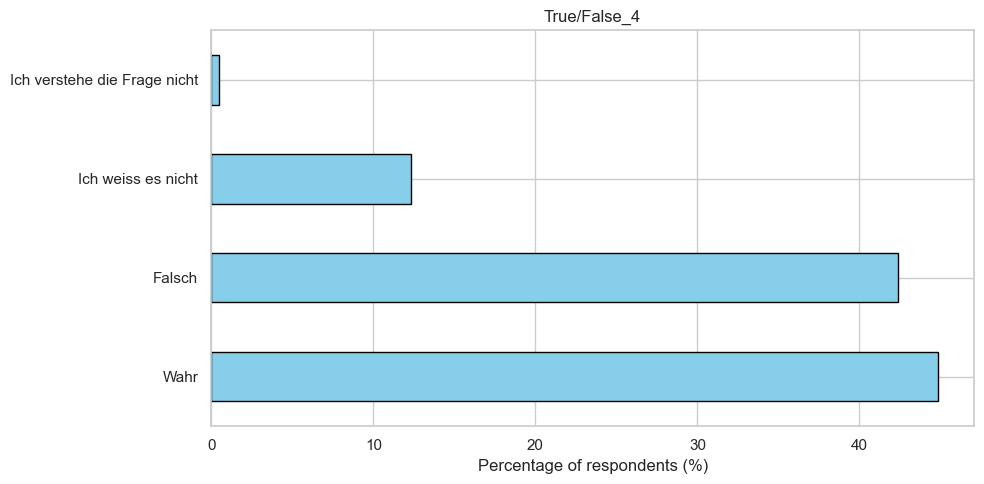

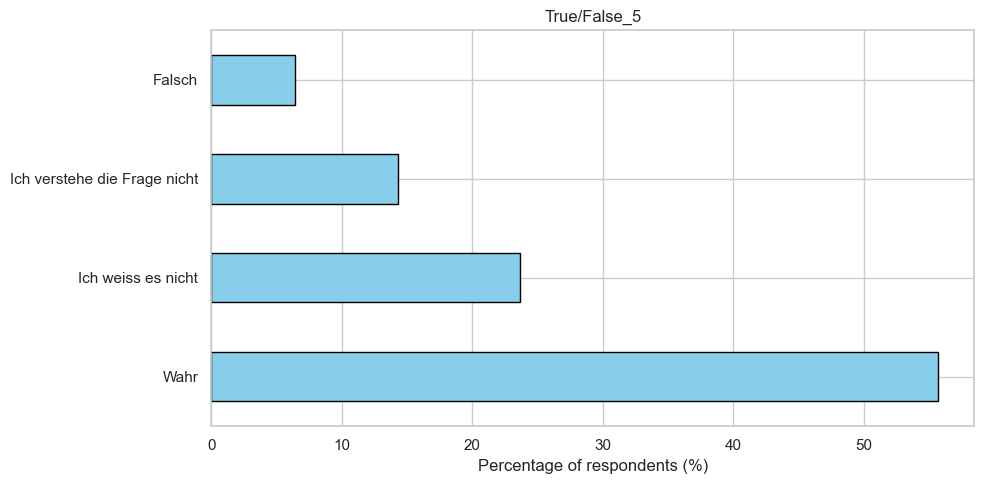

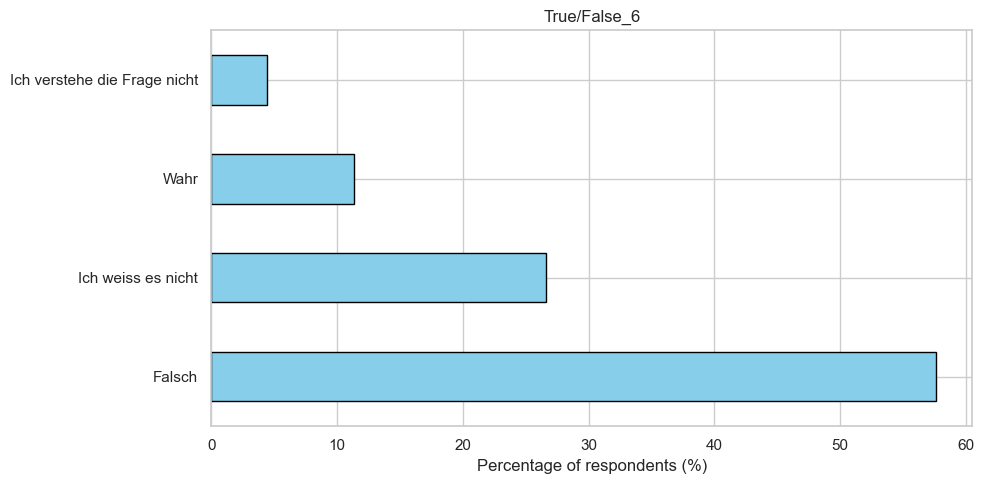

In [8]:
# Setup
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Shows distribution in graph form -----

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# import help functions
sys.path.append(os.path.abspath(".."))
from Helper_funtions import clean_up_subjects, calculate_true_false_score
from answer_categories import question_orders

# Daten laden
file_path = os.path.join("..", "Data", "Fertige Tabelle.xlsx")
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# Calculate True/False score and add to DataFrame
df = calculate_true_false_score(df)

# --- plot functions ---

def plot_single_choice_distribution(df, column, title=None):
    data = df[column].dropna().astype(str).str.strip()
    data = data[data != ""]
    
    counts = data.value_counts()
    percents = data.value_counts(normalize=True) * 100

    if column in question_orders:
        ordered = [opt for opt in question_orders[column] if opt in counts.index]
        counts = counts.reindex(ordered)
        percents = percents.reindex(ordered)

    plot = percents.plot.barh(color="skyblue", edgecolor="black")
    plt.title(title if title else column)
    plt.xlabel("Percentage of respondents (%)")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


def plot_multiple_choice_distribution(df, column, title=None):
    data = df[column].dropna().astype(str).str.strip()
    data = data[data != ""]
    num_respondents = data.shape[0]

    exploded = data.str.split(",").explode().str.strip()
    counts = exploded.value_counts()
    percents = (counts / num_respondents * 100).round(1)

    plot = percents.plot.barh(color="lightgreen", edgecolor="black")
    plt.title(title if title else column)
    plt.xlabel("Percentage of respondents (%)")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# --- Single-Choice questions ---

single_choice = [
    "Use AI school and freetime",
    "Frequency of use education",
    "Frequency of use everyday life",
    "Usefullness AI",
    "Deal with AI",
    "Understanding AI",
    "Reliability AI",
    "Concerns AI",
    "Teachers preparing lessons",
    "Teachers giving grades",
    "Mates using AI",
    "Allowance to use AI",
    "Frequency use of AI_school",
    "Help of AI",
    "True_False_Score"
]

for column in single_choice:
    plot_single_choice_distribution(df, column, title=f"{column}")

# --- Multiple-Choice questions ---

multiple_choice = [
    "Used AI",
    "Use of AI in freetime",
    "Most used subjects",
    "Purposes to use AI",
    "Reasons to use AI"
]

# clean up of subjects -> 
df = clean_up_subjects(df, "Most used subjects")

for column in multiple_choice:
    plot_multiple_choice_distribution(df, column, title=f"{column}")

# --- Internet Terms Fragen ---

internet_columns = [col for col in df.columns if col.startswith("Internet terms_")]

for column in internet_columns:
    plot_single_choice_distribution(df, column, title=column)

# --- True/False Fragen ---

true_false_columns = [col for col in df.columns if col.startswith("True/False_")]

for column in true_false_columns:
    plot_single_choice_distribution(df, column, title=column)


In [ ]:
import os
import pandas as pd

# ----- looks for relationship between frequency of use everyday life and frequency of use education,
#  same scales and part of the same question, so good to compare -----

# Daten laden
file_path = os.path.join("..", "Data", "Fertige Tabelle.xlsx")
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# Mapping Answeroptions
usage_scale = {
    "Sehr oft": 5,
    "Oft": 4,
    "Manchmal": 3,
    "Selten": 2,
    "Nie": 1
}

col_school = "Frequency of use education"
col_everyday = "Frequency of use everyday life"

valid = df[[col_school, col_everyday]].dropna()

# Delete empty strings
valid = valid[(valid[col_school].str.strip() != "") & (valid[col_everyday].str.strip() != "")]

# Change answers to numbers
valid["score_school"] = valid[col_school].map(usage_scale)
valid["score_everyday"] = valid[col_everyday].map(usage_scale)

# Calculate difference
valid["difference"] = valid["score_school"] - valid["score_everyday"]

# Count results
result = valid["difference"].value_counts().sort_index()

# Change to dataframe
result_df = pd.DataFrame({
    "Differenz (school - everyday life)": result.index,
    "Anzahl Schüler:innen": result.values,
    "Prozent": (result.values / result.values.sum() * 100).round(1)
})

print("\n📊 Comparision usage everyday life vs. education:")
print(result_df)


In [ ]:
import os
import pandas as pd

# ----- looks for relationship between frequency of use for education and frequency of use for school, so essentially the same question, 
# but due to different scale conotations, the results differ from one another

# Daten laden
file_path = os.path.join("..", "Data", "Fertige Tabelle.xlsx")
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

# Mapping Answeroptions
usage_scale_1 = {
    "Sehr oft": 5,
    "Oft": 4,
    "Manchmal": 3,
    "Selten": 2,
    "Nie": 1
}

# Mapping Answeroptions
usage_scale_2 = {
    "Immer": 5,
    "Häufig": 4,
    "Manchmal": 3,
    "Selten": 2,
    "Nie": 1
}

col_school = "Frequency of use education"
col_school_1 = "Frequency of use AI_school"

valid = df[[col_school, col_everyday]].dropna()

# Delete empty strings
valid = valid[(valid[col_school].str.strip() != "") & (valid[col_everyday].str.strip() != "")]

# Change answers to numbers
valid["score_school"] = valid[col_school].map(usage_scale_1)
valid["score_school_1"] = valid[col_everyday].map(usage_scale_2)

# Calculate difference
valid["difference"] = valid["score_school"] - valid["score_school_1"]

# Count results
result = valid["difference"].value_counts().sort_index()

# Change to dataframe
result_df = pd.DataFrame({
    "Differenz (school - school_1)": result.index,
    "Anzahl Schüler:innen": result.values,
    "Prozent": (result.values / result.values.sum() * 100).round(1)
})

print("\n📊 Comparision usage school_1 vs. education:")
print(result_df)
